<a href="https://colab.research.google.com/github/estermartins/Machine-Learning/blob/master/MLaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

**Unidade 2 - Clssificação **

Professor Neylson Crepalde

Ester Pereir Martins

Data: 20/03/2019

In [4]:
import pandas as pd  ## banco de dados
import numpy as np  ## cálculo numérico
import seaborn as sns  ## gráficos
import matplotlib.pyplot as plt  ## gráficos e visualizações
%matplotlib inline  ## comando para plotar os gráficos no notebook
from statsmodels.discrete.discrete_model import Logit  ## reg logísticas

UsageError: unrecognized arguments: # comando para plotar os gráficos no notebook


In [5]:
# Importando o banco de dados Default
bd = pd.read_csv("https://raw.githubusercontent.com/neylsoncrepalde/ML_classes/master/Default.csv")
bd.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
# Estatíticas descritivas
bd.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [8]:
bd.describe(include="all")

,default,student,balance,income
count,10000,10000,10000.000000,10000.000000
unique,2,2,NaN,NaN
top,No,No,NaN,NaN
freq,9667,7056,NaN,NaN
mean,NaN,NaN,835.374886,33516.981876
std,NaN,NaN,483.714985,13336.639563
min,NaN,NaN,0.000000,771.967729
25%,NaN,NaN,481.731105,21340.462903
50%,NaN,NaN,823.636973,34552.644802
75%,NaN,NaN,1166.308386,43807.729272


In [9]:
bd.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [10]:
bd.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

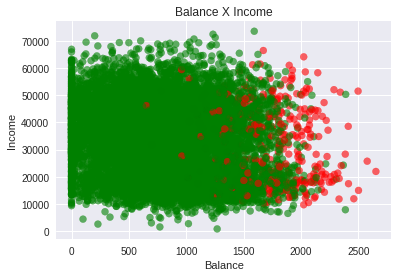

In [18]:
# Plotar um gráfico com a classificação de Default e NãoDefault
# Criar cor
color = []
for i in bd.default:
  if i == "Yes":
      color.append("red")
  else:
      color.append("green")
      
      
plt.scatter(x=bd.balance, y=bd.income, color=color, alpha = 0.6)    
plt.title("Balance X Income")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.show()

In [20]:
# Prever se a pessoa não irá pagar a conta
# Montando o modelo com statsmodel
bd1 = pd.get_dummies(bd, drop_first=True)
bd1.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [27]:
intercept = pd.DataFrame({"Intercept": [1] * bd.shape[0]})
y = bd1.default_Yes
x = pd.concat([bd.balance, intercept], axis = 1)
x.head()

,balance,Intercept
0,729.526495,1
1,817.180407,1
2,1073.549164,1
3,529.250605,1
4,785.655883,1


In [29]:
# Montando uma logística apenas com balance
model1 = Logit(y , x).fit()
print(model1.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                        Results: Logit
Model:              Logit            No. Iterations:   10.0000
Dependent Variable: default_Yes      Pseudo R-squared: nan    
Date:               2019-03-21 01:13 AIC:              inf    
No. Observations:   10000            BIC:              inf    
Df Model:           1                Log-Likelihood:   -inf   
Df Residuals:       9998             LL-Null:          -inf   
Converged:          1.0000           Scale:            1.0000 
--------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------
balance       0.0055   0.0002  24.9524 0.0000   0.0051  0.0059
Intercept   -10.6513   0.3612 -29.4913 0.0000 -11.3592 -9.9435



/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2397: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.llf/self.llnull


In [31]:
# Montando o mesmo modelo com Income
x = pd.concat([bd1.income, intercept], axis=1)
model2 = Logit(y,x).fit()
print(model2.summary2())
# maior renda menor chance de pagar a conta

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                       Results: Logit
Model:              Logit            No. Iterations:   7.0000
Dependent Variable: default_Yes      Pseudo R-squared: nan   
Date:               2019-03-21 01:16 AIC:              inf   
No. Observations:   10000            BIC:              inf   
Df Model:           1                Log-Likelihood:   -inf  
Df Residuals:       9998             LL-Null:          -inf  
Converged:          1.0000           Scale:            1.0000
-------------------------------------------------------------
              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------
income       -0.0000   0.0000  -1.9852 0.0471 -0.0000 -0.0000
Intercept    -3.0941   0.1463 -21.1556 0.0000 -3.3808 -2.8075



/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2397: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.llf/self.llnull


In [33]:
x = pd.concat([bd1.student_Yes, intercept], axis=1)
model3 = Logit(y,x).fit()
print(model3.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                       Results: Logit
Model:              Logit            No. Iterations:   7.0000
Dependent Variable: default_Yes      Pseudo R-squared: nan   
Date:               2019-03-21 01:20 AIC:              inf   
No. Observations:   10000            BIC:              inf   
Df Model:           1                Log-Likelihood:   -inf  
Df Residuals:       9998             LL-Null:          -inf  
Converged:          1.0000           Scale:            1.0000
-------------------------------------------------------------
              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------
student_Yes   0.4049   0.1150   3.5202 0.0004  0.1795  0.6303
Intercept    -3.5041   0.0707 -49.5541 0.0000 -3.6427 -3.3655



/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2397: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.llf/self.llnull


In [34]:
# Montando o modelo com todas as variáveis
x = pd.concat([bd1.drop(columns="default_Yes"), intercept], axis=1)
model4 = Logit(y,x).fit()
print(model4.summary2())

# balance significativo
# quanto maoir for a média da fatura do cartão maior as chances de não pagar a fatura
# balance estudante nao significativo
# quem é estudante tem menos chances de não pagar do que quem não é 

Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                        Results: Logit
Model:              Logit            No. Iterations:   10.0000
Dependent Variable: default_Yes      Pseudo R-squared: nan    
Date:               2019-03-21 01:23 AIC:              inf    
No. Observations:   10000            BIC:              inf    
Df Model:           3                Log-Likelihood:   -inf   
Df Residuals:       9996             LL-Null:          -inf   
Converged:          1.0000           Scale:            1.0000 
--------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------
balance       0.0057   0.0002  24.7365 0.0000   0.0053  0.0062
income        0.0000   0.0000   0.3698 0.7115  -0.0000  0.0000
student_Yes  -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
Intercept   -10.8690   0.4923 -22.0793 0.000

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2397: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.llf/self.llnull
